## Abstract Hamiltonian terms

In [1]:
from micromagneticmodel.hamiltonian import Hamiltonian
from micromagneticmodel.hamiltonian import ExchangeAbstract, ZeemanAbstract
from micromagneticmodel.hamiltonian import DemagAbstract, UniaxialAnisotropyAbstract

In [2]:
class Exchange(ExchangeAbstract):
    def calculator_script(self):
        raise NonImplementedError()
        
class Zeeman(ZeemanAbstract):
    def calculator_script(self):
        raise NonImplementedError()
        
class Demag(DemagAbstract):
    def calculator_script(self):
        raise NonImplementedError()
        
class UniaxialAnisotropy(UniaxialAnisotropyAbstract):
    def calculator_script(self):
        raise NonImplementedError()

In [3]:
hamiltonian = Hamiltonian()
hamiltonian

In [4]:
exchange = Exchange(8.78e-12)
exchange

In [5]:
hamiltonian.add(exchange)
hamiltonian

In [6]:
zeeman = Zeeman((1e6, 1e6, 1e6))
zeeman

In [7]:
hamiltonian.add(zeeman)
hamiltonian

In [8]:
anisotropy = UniaxialAnisotropy(1e3, (0, 0, 1))
anisotropy

In [9]:
hamiltonian.add(anisotropy)
hamiltonian

In [10]:
demag = Demag()
demag

In [11]:
hamiltonian.add(demag)
hamiltonian

### Adding energy terms

In [12]:
hamiltonian2 = exchange + anisotropy + demag + zeeman
hamiltonian2

## Dynamics

In [13]:
from micromagneticmodel.dynamics import Dynamics
from micromagneticmodel.dynamics import PrecessionAbstract, DampingAbstract

In [14]:
class Precession(PrecessionAbstract):
    def calculator_script(self):
        raise NonImplementedError()
        
class Damping(DampingAbstract):
    def calculator_script(self):
        raise NonImplementedError()

In [15]:
gamma = 2.21e5
precession = Precession(gamma)
precession

In [16]:
alpha = 0.1
damping = Damping(alpha)
damping

In [17]:
dynamics = precession + damping
dynamics

## Mesh

In [18]:
from micromagneticmodel.mesh import MeshAbstract

In [19]:
class Mesh(MeshAbstract):
    def calculator_script(self):
        raise NonImplementedError()

In [20]:
cmin = (0, 0, 0)
cmax = (100, 100, 100)
d = (10, 10, 25)

mesh = Mesh(cmin, cmax, d)

<IPython.core.display.Javascript object>


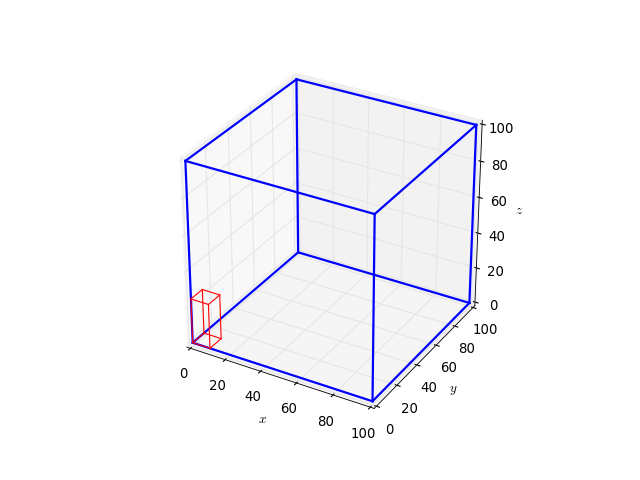

In [21]:
mesh

## Abstract micormagnetic Model

In [22]:
from micromagneticmodel.simabstract import SimAbstract

In [23]:
cmin = (0, 0, 0)
cmax = (100, 100, 100)
d = (10, 10, 10)

mesh = Mesh(cmin, cmax, d)

In [25]:
Ms = 8.6e5

sim = SimAbstract(mesh, Ms, name='mumag_model')

In [30]:
A = 8.78e-12
D = 1.58e-3
K = 1.5e3
u = (0, 0, 1)
H = (0.5*Ms, 0, 0)

sim.hamiltonian = Exchange(A) + UniaxialAnisotropy(K, u) + Zeeman(H) + Demag()

In [31]:
gamma = 2.21e5
alpha = 0.1

sim.dynamics = Precession(gamma) + Damping(alpha)

<IPython.core.display.Javascript object>


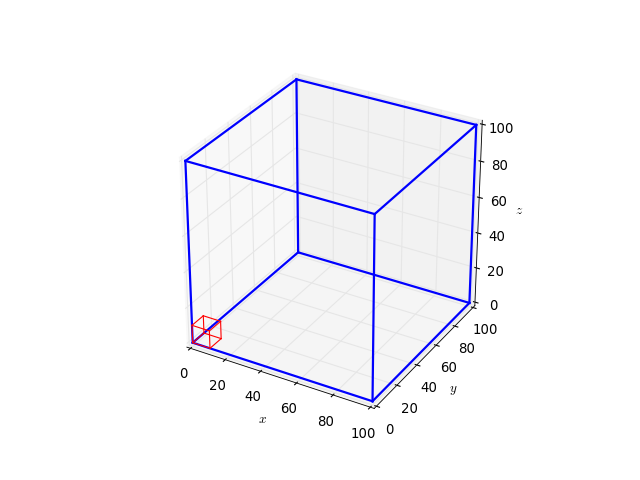

In [34]:
sim.mesh

In [33]:
sim.hamiltonian

In [35]:
sim.dynamics